In [1]:
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.preprocessing import MinMaxScaler

data=pd.read_csv("project.csv" )
columns_to_keep = ['year','g']
df = data[columns_to_keep]
df['year'] = pd.to_datetime(df['year'])
df.set_index('year', inplace=True)
df

<ipython-input-1-5e75dce84160>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['year'] = pd.to_datetime(df['year'])


,g
year,
1960-01-01,1.369444e+12
1961-01-01,1.425115e+12
1962-01-01,1.530069e+12
1963-01-01,1.648305e+12
1964-01-01,1.805674e+12
...,...
2018-01-01,8.643942e+13
2019-01-01,8.779853e+13
2020-01-01,8.297824e+13


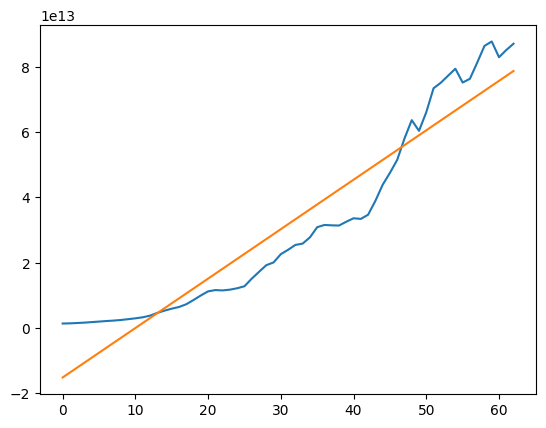

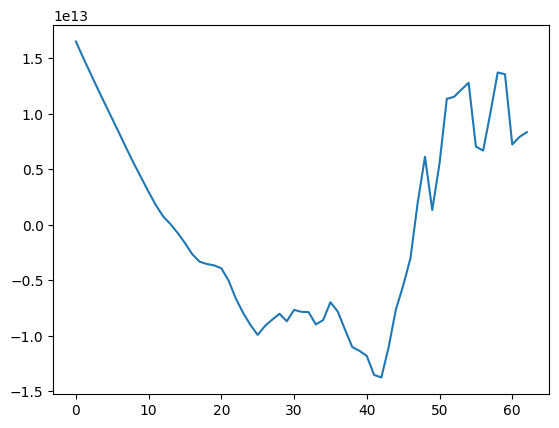

In [2]:

from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
import numpy

def parser(x):
	return datetime.strptime('190'+x, '%Y-%m')

series =df
# fit linear model
X = [i for i in range(0, len(series))]
X = numpy.reshape(X, (len(X), 1))
y = series.values
model = LinearRegression()
model.fit(X, y)
# calculate trend
trend = model.predict(X)
# plot trend
pyplot.plot(y)
pyplot.plot(trend)
pyplot.show()
# detrend
detrended = [y[i]-trend[i] for i in range(0, len(series))]
# plot detrended
pyplot.plot(detrended)
pyplot.show()